In [16]:
import numpy as np
import matplotlib.pyplot as plt
from configs import project_config
from configs.RecursiveVPSDE.LSTM_4DLorenz.recursive_LSTM_PostMeanScore_4DLorenz_T256_H05_tl_110data import \
    get_config

In [17]:
Nepoch = 1440
config = get_config()
deltaT = config.deltaT
network_type = "LSTM"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/TSPM_LSTM_4DLorenz_DriftEvalExp_1440Nep_tl110data_00t0_3906e-03dT_1NDT


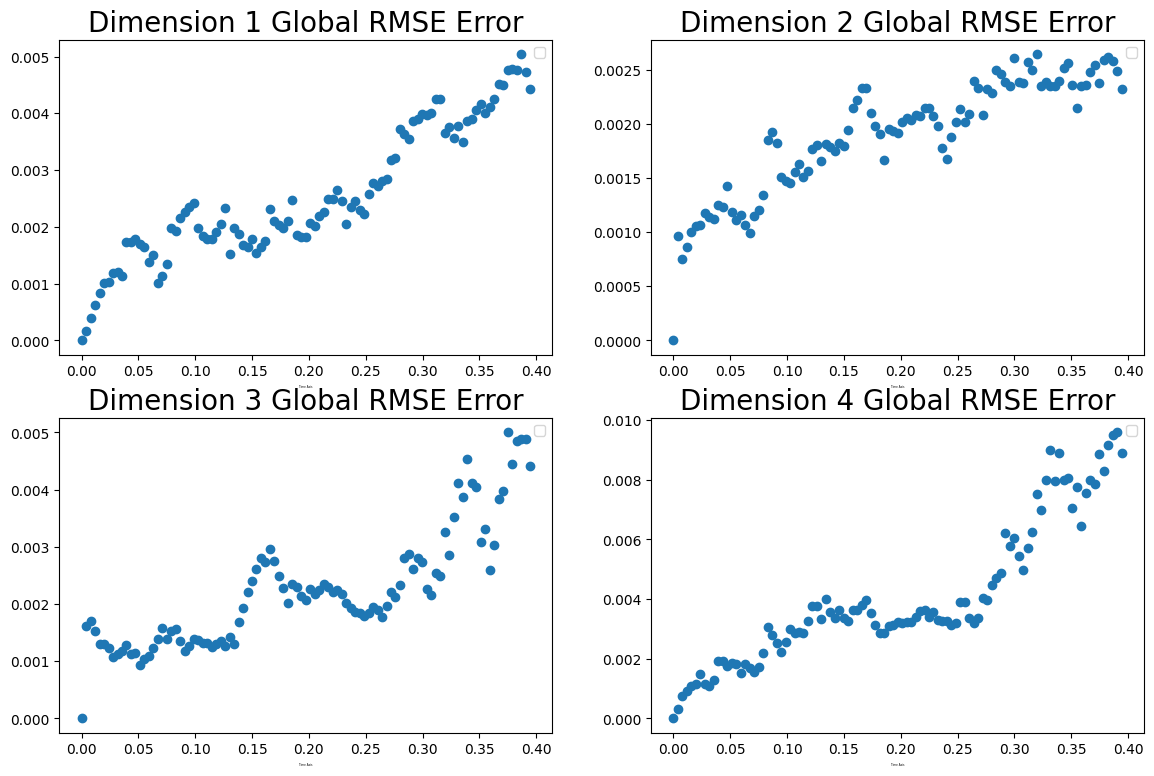

In [19]:
num_diff_times = 1
save_path = (
            project_config.ROOT_DIR + f"experiments/results/TSPM_LSTM_{config.ndims}DLorenz_DriftEvalExp_{Nepoch}Nep_tl{config.tdata_mult}data_{config.t0}t0_{config.deltaT:.3e}dT_{num_diff_times}NDT").replace(
        ".", "")
print(save_path)
true_states = np.load(save_path + "_global_true_states.npy")
global_states= np.load(save_path + "_global_states.npy")
global_states= np.load(save_path + "_local_states.npy")
global_errors = np.power(np.mean(np.power(true_states- global_states,2), axis=0), 0.5)
fig, ax = plt.subplots(2,2, figsize=(14,9))
for dim in range(global_errors.shape[1]):
    if dim == 0: i,j = 0,0
    elif dim == 1: i,j = 0,1
    elif dim == 2: i,j = 1, 0
    else: i,j = 1,1
    ax[i,j].scatter(np.linspace(0.,deltaT*global_errors.shape[0],global_errors.shape[0]), global_errors[:, dim])
    ax[i,j].set_title(f"Dimension {dim+1} Global RMSE Error", fontsize=20)
    ax[i,j].set_xlabel("Time Axis", fontsize=2)
    ax[i,j].legend()
plt.show()
plt.close()